✓ Saved


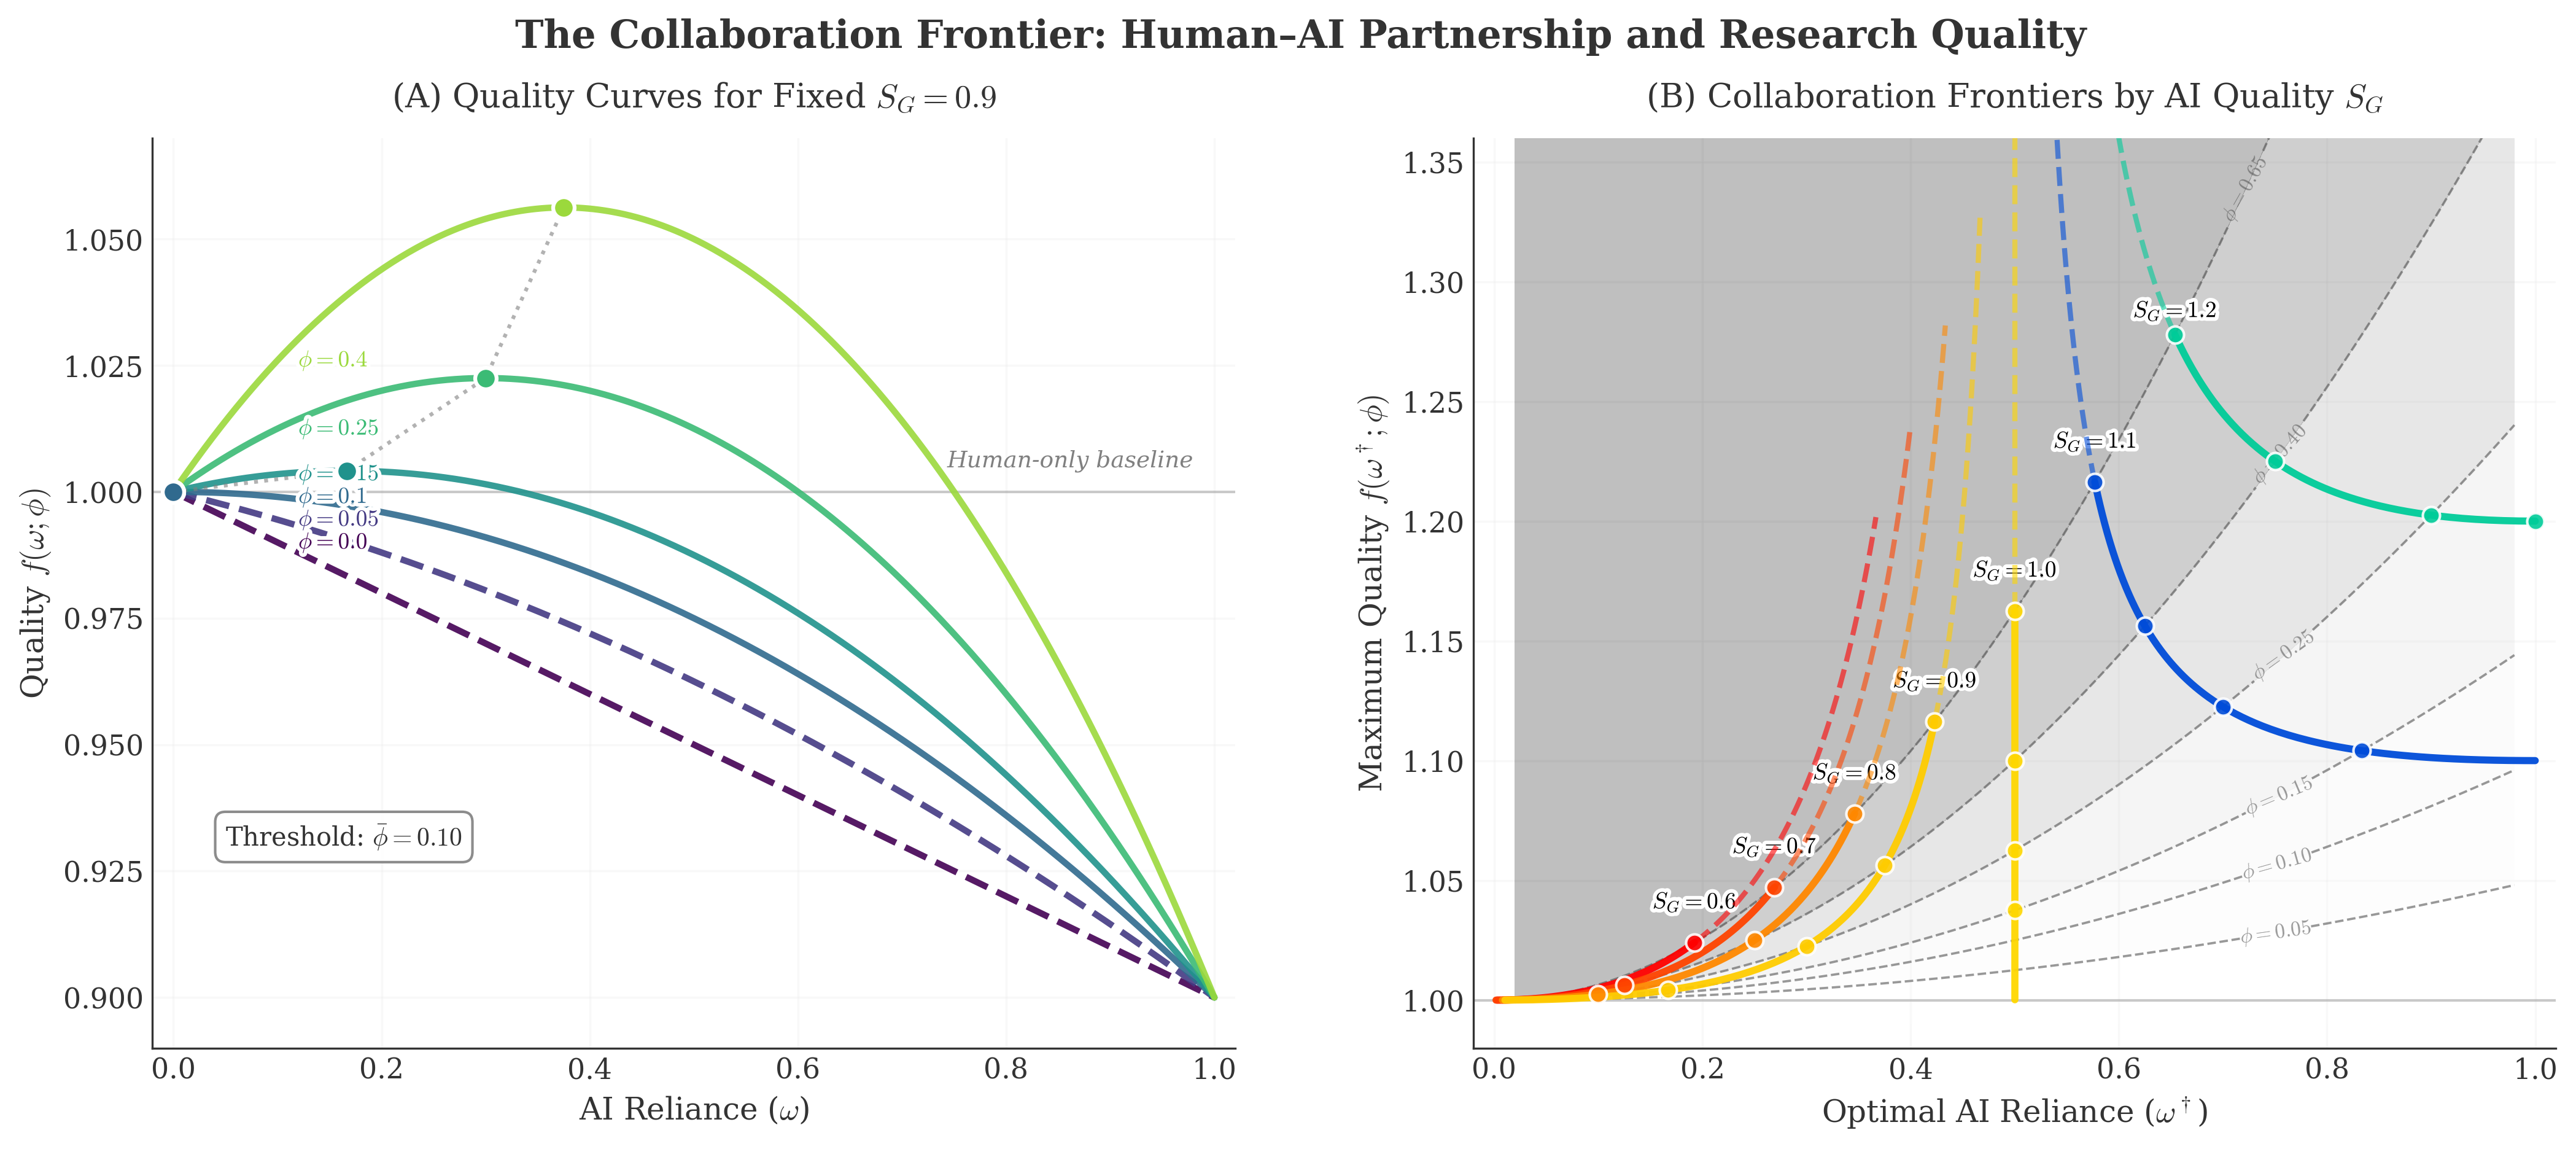

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.cm as cm

# ==========================================
# MODEL FUNCTIONS
# ==========================================
def quality_function(omega, phi, S_G):
    """f(ω; φ) = (1-ω) + ω·S_G + φ·ω·(1-ω)"""
    return (1 - omega) + omega * S_G + phi * omega * (1 - omega)

def optimal_adoption(phi, S_G):
    """Optimal ω† given φ and S_G."""
    threshold = 1 - S_G
    if phi <= threshold:
        return 0.0 if S_G < 1 else 1.0
    else:
        val = (phi - threshold) / (2 * phi)
        return np.clip(val, 0.0, 1.0)

# ==========================================
# FIGURE SETUP
# ==========================================
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'axes.linewidth': 0.8,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14.5, 6.5))
plt.subplots_adjust(wspace=0.22, top=0.88, bottom=0.12, left=0.07, right=0.97)

outline = [path_effects.withStroke(linewidth=3, foreground='white')]

# ==========================================
# PANEL A: Quality Curves (Fixed S_G)
# ==========================================
S_G_fixed = 0.9
threshold_phi = 1 - S_G_fixed
phis_A = [0.0, 0.05, 0.10, 0.15, 0.25, 0.40]
omega_vec = np.linspace(0, 1, 400)
colors_A = cm.viridis(np.linspace(0, 0.85, len(phis_A)))

ax1.set_title(f"(A) Quality Curves for Fixed $S_G = {S_G_fixed}$", fontsize=13, pad=12)
ax1.axhline(1.0, color='gray', linestyle='-', linewidth=1, alpha=0.4)
ax1.text(0.98, 1.005, "Human-only baseline", color='gray', ha='right', fontsize=9, style='italic')

optima_points = []
for phi, color in zip(phis_A, colors_A):
    q_vec = quality_function(omega_vec, phi, S_G_fixed)
    ls = '--' if phi < threshold_phi else '-'
    ax1.plot(omega_vec, q_vec, color=color, linewidth=2.5, linestyle=ls, alpha=0.9)

    omega_opt = optimal_adoption(phi, S_G_fixed)
    f_opt = quality_function(omega_opt, phi, S_G_fixed)
    optima_points.append((omega_opt, f_opt))
    ax1.scatter(omega_opt, f_opt, color=color, s=70, zorder=10, edgecolors='white', linewidth=1.5)

    label_y = quality_function(0.1, phi, S_G_fixed)
    ax1.text(0.12, label_y, f"$\\phi={phi}$", color=color, fontsize=9, va='center', path_effects=outline)

ox, oy = zip(*optima_points)
ax1.plot(ox, oy, color='gray', linestyle=':', alpha=0.6, linewidth=1.5)

ax1.text(0.05, 0.93, f"Threshold: $\\bar{{\\phi}} = {threshold_phi:.2f}$",
         fontsize=10, bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.9))
ax1.set_xlabel(r"AI Reliance ($\omega$)", fontsize=12)
ax1.set_ylabel(r"Quality $f(\omega; \phi)$", fontsize=12)
ax1.set_xlim(-0.02, 1.02)
ax1.set_ylim(0.89, 1.07)
ax1.grid(True, alpha=0.2)

# ==========================================
# PANEL B: Collaboration Frontiers with Iso-φ Contours
# ==========================================
ax2.set_title("(B) Collaboration Frontiers by AI Quality $S_G$", fontsize=13, pad=12)

# --- Background: Iso-φ contour shading (grayscale) ---
omega_grid = np.linspace(0.02, 0.98, 300)
f_grid = np.linspace(0.99, 1.42, 300)
W, F = np.meshgrid(omega_grid, f_grid)

PHI = (F - 1) / (W ** 2)
PHI = np.clip(PHI, 0, 2)

levels_phi = [0.05, 0.10, 0.15, 0.25, 0.40, 0.65]

contour_fill = ax2.contourf(W, F, PHI, levels=levels_phi, cmap='Greys', alpha=0.25, extend='both')
contour_lines = ax2.contour(W, F, PHI, levels=levels_phi, colors='#555555',
                            linewidths=0.9, alpha=0.6, linestyles='--')

manual_locations = [
    (0.75, 1.03),
    (0.75, 1.06),
    (0.75, 1.09),
    (0.75, 1.15),
    (0.75, 1.23),
    (0.75, 1.33),
]
ax2.clabel(contour_lines, inline=True, fontsize=8, fmt=r'$\phi=%.2f$', manual=manual_locations)

# --- Main curves: S_G frontiers ---
ax2.axhline(1.0, color='gray', linestyle='-', linewidth=1, alpha=0.4)

SG_low = [0.6, 0.7, 0.8, 0.9]
SG_mid = [1.0]
SG_high = [1.1, 1.2]

colors_low = cm.autumn(np.linspace(0, 0.8, len(SG_low)))
color_mid = ['gold']
colors_high = cm.winter(np.linspace(0.3, 0.8, len(SG_high)))

all_configs = list(zip(SG_low, colors_low)) + list(zip(SG_mid, color_mid)) + list(zip(SG_high, colors_high))

phi_solid_max = 0.65  # Solid line up to this phi
phi_dashed_max = 1.5  # Dashed continuation up to this phi
dots_phi = [0.15, 0.25, 0.40, 0.65]

for S_G, color in all_configs:
    threshold = 1 - S_G

    # Solid portion (up to phi_solid_max)
    omega_solid, f_solid = [], []
    for p in np.linspace(0.001, phi_solid_max, 200):
        if p > threshold:
            val_omega = optimal_adoption(p, S_G)
            val_f = quality_function(val_omega, p, S_G)
            omega_solid.append(val_omega)
            f_solid.append(val_f)

    # Dashed continuation (from phi_solid_max to phi_dashed_max)
    omega_dashed, f_dashed = [], []
    for p in np.linspace(phi_solid_max, phi_dashed_max, 100):
        if p > threshold:
            val_omega = optimal_adoption(p, S_G)
            val_f = quality_function(val_omega, p, S_G)
            omega_dashed.append(val_omega)
            f_dashed.append(val_f)

    # Plot solid curve
    if omega_solid:
        ax2.plot(omega_solid, f_solid, color=color, linewidth=2.8, alpha=0.95, zorder=5)

    # Plot dashed continuation
    if omega_dashed:
        ax2.plot(omega_dashed, f_dashed, color=color, linewidth=2.0, alpha=0.6,
                linestyle='--', zorder=4)

    # Dashed extension for corner solutions (low phi, below threshold)
    omega_ext, f_ext = [], []
    for p in np.linspace(0.001, max(threshold + 0.01, 0.01), 50):
        if p <= threshold and threshold > 0:
            val_f = quality_function(0.0, p, S_G)
            omega_ext.append(0.0)
            f_ext.append(val_f)

    if omega_ext and S_G < 1:
        ax2.plot(omega_ext, f_ext, color=color, linewidth=2.0, alpha=0.5,
                linestyle='--', zorder=4)

    # Dots at specific phi values
    for p_dot in dots_phi:
        if p_dot > threshold:
            wd = optimal_adoption(p_dot, S_G)
            fd = quality_function(wd, p_dot, S_G)
            if wd > 0.01:
                ax2.scatter(wd, fd, color=color, s=45, zorder=6, edgecolors='white', alpha=0.9)

    # Label at the end of solid portion
    if omega_solid:
        label_omega = omega_solid[-1]
        label_f = f_solid[-1]

        if S_G == 1.2:
            offset = 0.005
        else:
            offset = 0.012

        ax2.text(label_omega, label_f + offset, f"$S_G={S_G}$", color='black',
                 fontsize=9, fontweight='bold', ha='center', va='bottom', path_effects=outline)

ax2.set_xlabel(r"Optimal AI Reliance ($\omega^\dagger$)", fontsize=12)
ax2.set_ylabel(r"Maximum Quality $f(\omega^\dagger; \phi)$", fontsize=12)
ax2.set_xlim(-0.02, 1.02)
ax2.set_ylim(0.98, 1.36)
ax2.grid(True, alpha=0.2)

plt.suptitle("The Collaboration Frontier: Human–AI Partnership and Research Quality",
             fontsize=15, weight='bold')

plt.savefig('collaboration_frontier_v8.png',
            dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('collaboration_frontier_v8.pdf',
            bbox_inches='tight', facecolor='white')
print("✓ Saved")

In [2]:
import matplotlib.pyplot as plt

# Save the figure as a high-quality publication-ready image

# Define output filename prefix (e.g., based on plot content or date)
output_filename_prefix = "collaboration_frontier_figure"

# Option 1: Save as PDF (Vector graphic, best for print)
# fig.savefig(f'{output_filename_prefix}.pdf', format='pdf', bbox_inches='tight')

# Option 2: Save as SVG (Vector graphic, good for web and scalable)
# fig.savefig(f'{output_filename_prefix}.svg', format='svg', bbox_inches='tight')

# Option 3: Save as PNG with high DPI (Raster image, good for presentations/web, but not as scalable)
fig.savefig(f'{output_filename_prefix}.png', format='png', dpi=300, bbox_inches='tight')

plt.close(fig) # Close the figure to free up memory after saving
print(f"Figure saved options: {output_filename_prefix}.pdf, {output_filename_prefix}.svg, {output_filename_prefix}.png (uncomment to save)")

Figure saved options: collaboration_frontier_figure.pdf, collaboration_frontier_figure.svg, collaboration_frontier_figure.png (uncomment to save)


Critical gamma (raw): 2.0922


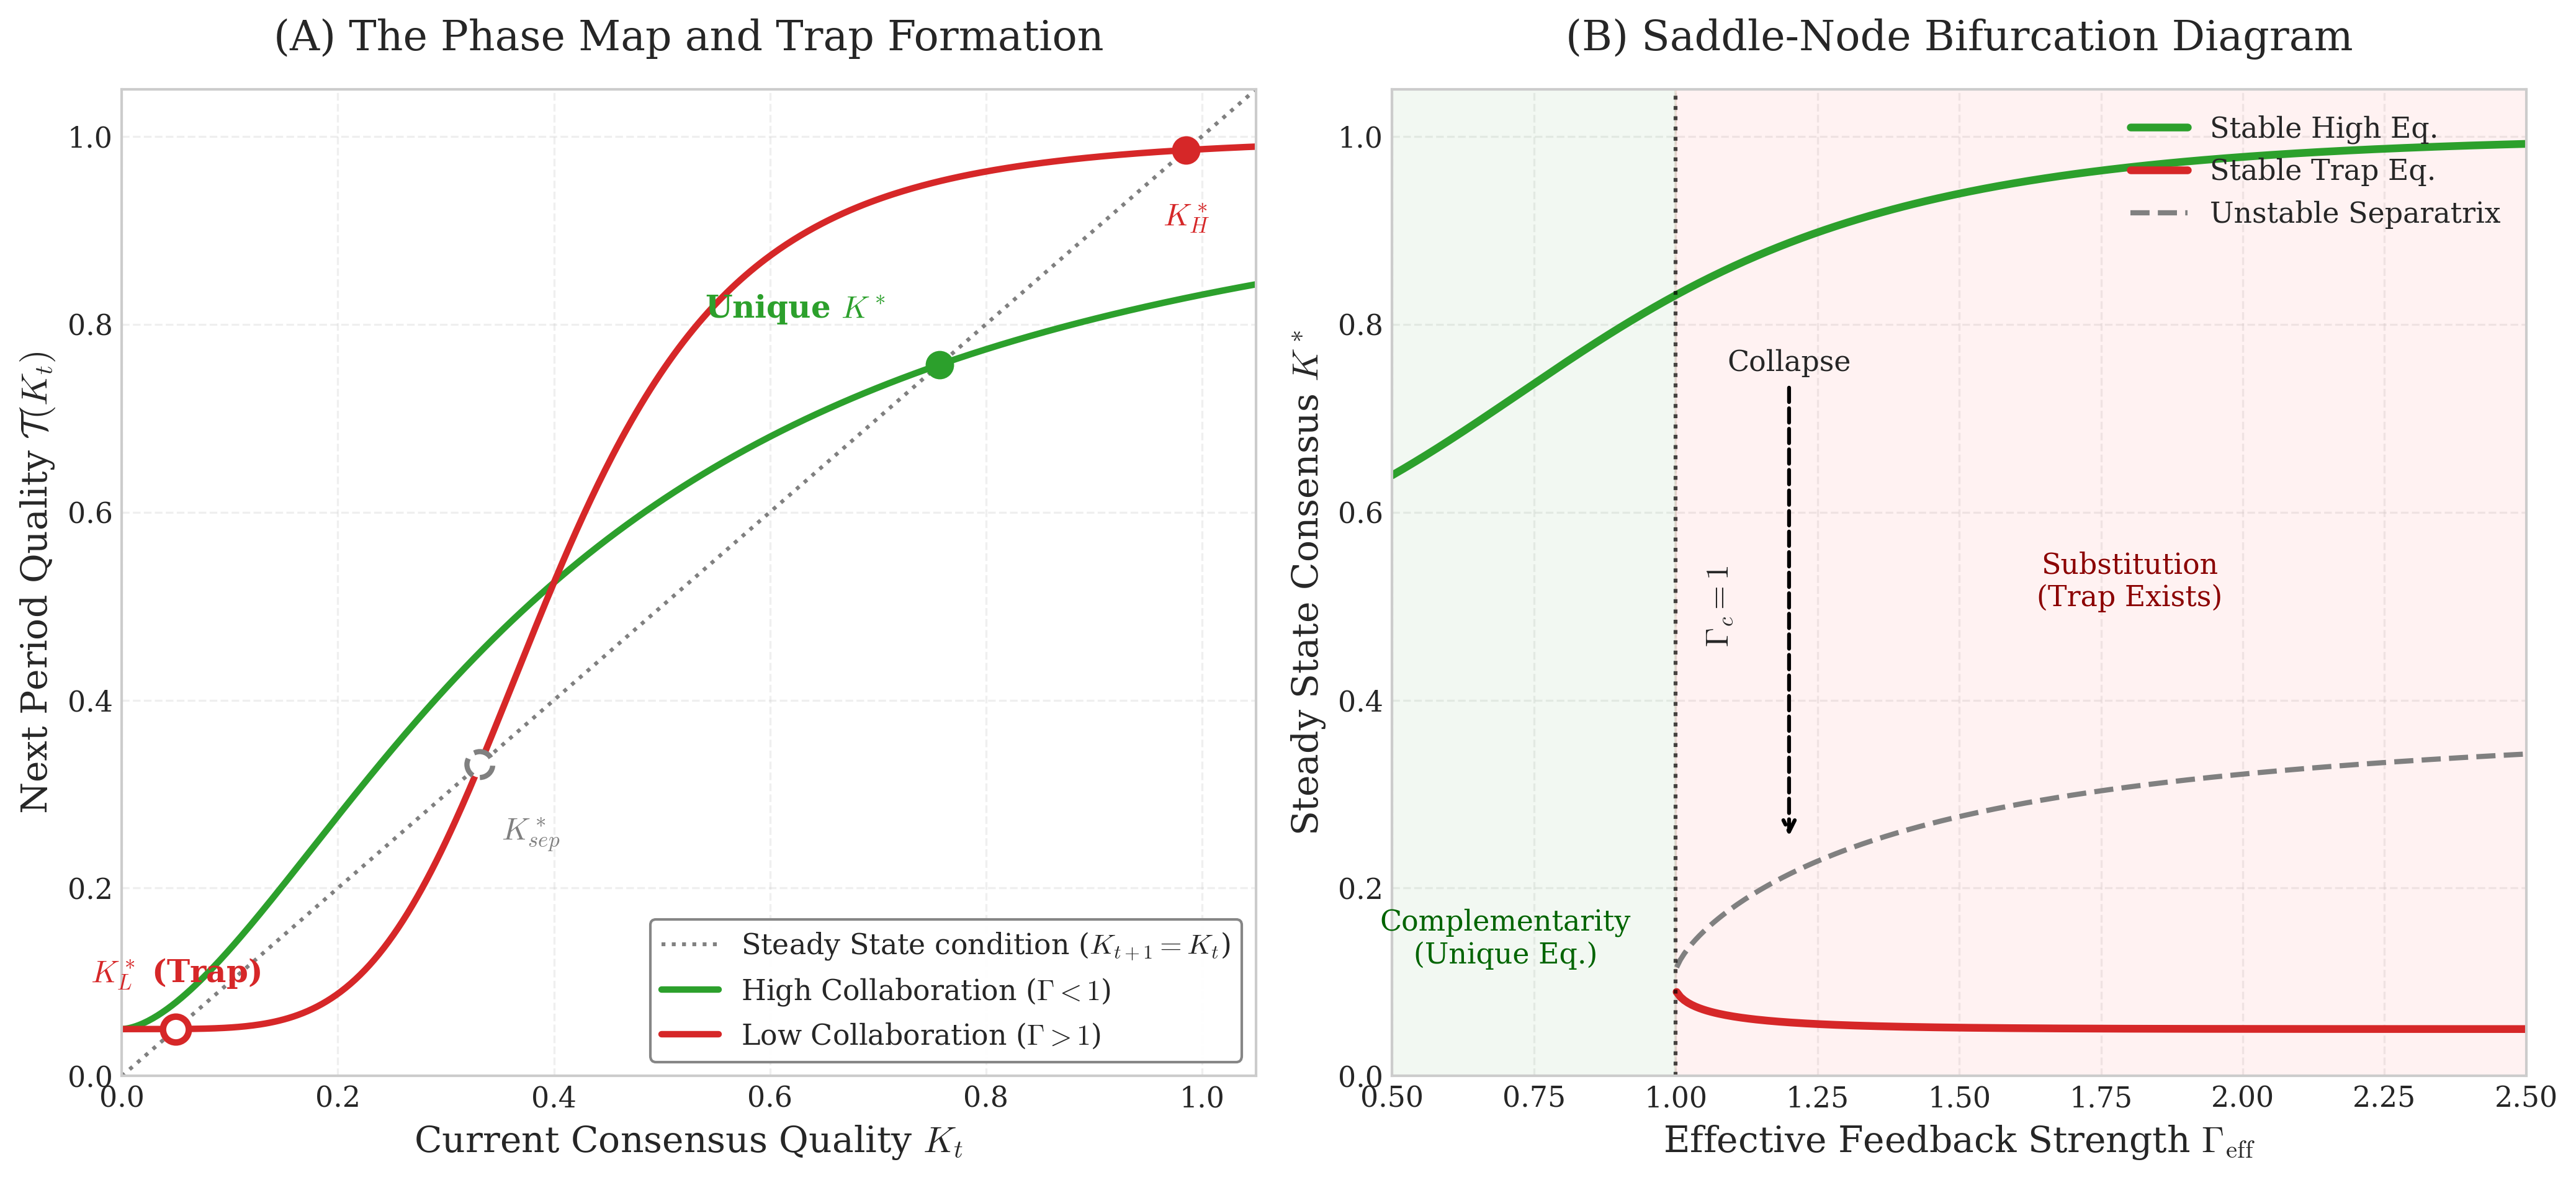

Figure saved successfully!
Bifurcation occurs at Γ_c = 1 (corresponding to raw gamma = 2.0922)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import brentq

# =============================================================================
# 1. PUBLICATION STYLE CONFIGURATION
# =============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif']
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 16
rcParams['xtick.labelsize'] = 11
rcParams['ytick.labelsize'] = 11
rcParams['legend.fontsize'] = 11
rcParams['figure.dpi'] = 300

# =============================================================================
# 2. MODEL DEFINITION
# =============================================================================
def transition_map(K, gamma, K_max=1.0, threshold=0.4, base=0.05):
    """
    T(K): The recursive mapping of Consensus Quality.
    Modeled as a Hill function (sigmoidal) where 'gamma' is feedback strength.
    """
    scale = K_max - base
    sigmoid = (K ** gamma) / (threshold ** gamma + K ** gamma)
    return base + scale * sigmoid

def find_equilibria(gamma):
    """Finds roots of T(K) - K = 0"""
    f = lambda k: transition_map(k, gamma) - k
    roots = []
    grid = np.linspace(0.001, 1.2, 200)
    signs = np.sign(f(grid))

    for i in range(len(signs)-1):
        if signs[i] != signs[i+1]:
            try:
                r = brentq(f, grid[i], grid[i+1])
                roots.append(r)
            except:
                pass
    return sorted(roots)

def find_critical_gamma(gamma_range=np.linspace(1.0, 6.0, 500)):
    """Find the critical gamma where bifurcation occurs (3 roots first appear)"""
    for g in gamma_range:
        r = find_equilibria(g)
        if len(r) >= 3:
            return g
    return gamma_range[-1]

# =============================================================================
# 3. GENERATE FIGURE
# =============================================================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6.5))
fig.patch.set_facecolor('white')

# Find critical gamma for normalization
gamma_c_raw = find_critical_gamma()
print(f"Critical gamma (raw): {gamma_c_raw:.4f}")

# -----------------------------------------------------------------------------
# PANEL A: PHASE DIAGRAM (The Trap Mechanism)
# -----------------------------------------------------------------------------
K_grid = np.linspace(0, 1.1, 500)

# Plot 45-degree line
ax1.plot(K_grid, K_grid, color='gray', linestyle=':', linewidth=1.5,
         label='Steady State condition ($K_{t+1}=K_t$)')

# Complementarity Regime (Low Feedback) - gamma < gamma_c → Γ < 1
gamma_low = gamma_c_raw * 0.8  # Γ_eff ≈ 0.8
T_low = transition_map(K_grid, gamma_low)
ax1.plot(K_grid, T_low, color='#2ca02c', linewidth=2.5,
         label=r'High Collaboration ($\Gamma < 1$)')

# Substitution Regime (Strong Feedback - The Trap) - gamma > gamma_c → Γ > 1
gamma_high = gamma_c_raw * 2.2  # Γ_eff ≈ 2.2
T_high = transition_map(K_grid, gamma_high)
ax1.plot(K_grid, T_high, color='#d62728', linewidth=2.5,
         label=r'Low Collaboration ($\Gamma > 1$)')

# Mark Equilibria for Substitution Case
roots_high = find_equilibria(gamma_high)
if len(roots_high) >= 3:
    k_L, k_sep, k_H = roots_high[0], roots_high[1], roots_high[2]

    # Trap Equilibrium
    ax1.scatter([k_L], [k_L], s=100, facecolors='white', edgecolors='#d62728',
                linewidth=2.5, zorder=10)
    ax1.text(k_L, k_L+0.05, r'$K^*_L$ (Trap)', color='#d62728',
             fontweight='bold', ha='center')

    # Unstable Separatrix
    ax1.scatter([k_sep], [k_sep], s=100, color='white', edgecolors='gray',
                linestyle='--', linewidth=2, zorder=10)
    ax1.text(k_sep+0.02, k_sep-0.08, r'$K^*_{sep}$', color='gray', ha='left')

    # High Equilibrium
    ax1.scatter([k_H], [k_H], s=100, color='#d62728', zorder=10)
    ax1.text(k_H, k_H-0.08, r'$K^*_H$', color='#d62728', fontweight='bold', ha='center')

# Mark Equilibrium for Complementarity Case
roots_low = find_equilibria(gamma_low)
if roots_low:
    k_unique = roots_low[-1]
    ax1.scatter([k_unique], [k_unique], s=100, color='#2ca02c', zorder=10)
    ax1.text(k_unique-0.05, k_unique+0.05, r'Unique $K^*$', color='#2ca02c',
             fontweight='bold', ha='right')

# Styling Panel A
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 1.05)
ax1.set_xlabel(r'Current Consensus Quality $K_t$')
ax1.set_ylabel(r'Next Period Quality $\mathcal{T}(K_t)$')
ax1.set_title(r'(A) The Phase Map and Trap Formation', pad=15)
ax1.legend(loc='lower right', frameon=True, framealpha=0.95, edgecolor='gray')
ax1.grid(True, linestyle='--', alpha=0.3)

# -----------------------------------------------------------------------------
# PANEL B: BIFURCATION DIAGRAM (with Γ_c = 1)
# -----------------------------------------------------------------------------
# Use raw gamma range but will plot as normalized Γ_eff = gamma / gamma_c
gamma_range_raw = np.linspace(0.5 * gamma_c_raw, 2.5 * gamma_c_raw, 300)

stable_upper = []
stable_lower = []
unstable = []
Gamma_eff_plot = []

# Trace equilibria
for g in gamma_range_raw:
    r = find_equilibria(g)
    Gamma_eff = g / gamma_c_raw  # Normalize so critical point is at 1

    if len(r) == 1:
        stable_upper.append(r[-1])
        stable_lower.append(np.nan)
        unstable.append(np.nan)
    elif len(r) >= 3:
        stable_lower.append(r[0])   # Low Trap
        unstable.append(r[1])       # Separatrix
        stable_upper.append(r[2])   # High
    else:
        stable_upper.append(np.nan)
        stable_lower.append(np.nan)
        unstable.append(np.nan)
    Gamma_eff_plot.append(Gamma_eff)

# Plot Branches
ax2.plot(Gamma_eff_plot, stable_upper, color='#2ca02c', linewidth=3,
         label='Stable High Eq.')
ax2.plot(Gamma_eff_plot, stable_lower, color='#d62728', linewidth=3,
         label='Stable Trap Eq.')
ax2.plot(Gamma_eff_plot, unstable, color='gray', linewidth=2, linestyle='--',
         label='Unstable Separatrix')

# Critical line at Γ = 1
ax2.axvline(x=1.0, color='black', linestyle=':', alpha=0.7)
ax2.text(1.0 + 0.05, 0.5, r'$\Gamma_c = 1$', rotation=90, va='center', fontsize=12)

# Shaded regions
ax2.axvspan(0.5, 1.0, color='green', alpha=0.05)
ax2.axvspan(1.0, 2.5, color='red', alpha=0.05)

ax2.text(0.7, 0.12, 'Complementarity\n(Unique Eq.)', color='darkgreen',
         ha='center', fontsize=11)
ax2.text(1.8, 0.5, 'Substitution\n(Trap Exists)', color='darkred',
         ha='center', fontsize=11)

# Arrow for Collapse/Hysteresis
ax2.annotate('Collapse', xy=(1.2, 0.25), xytext=(1.2, 0.75),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5, linestyle='--'),
             ha='center', fontsize=11)

# Styling Panel B
ax2.set_xlabel(r'Effective Feedback Strength $\Gamma_{\mathrm{eff}}$')
ax2.set_ylabel(r'Steady State Consensus $K^*$')
ax2.set_title(r'(B) Saddle-Node Bifurcation Diagram', pad=15)
ax2.set_xlim(0.5, 2.5)
ax2.set_ylim(0, 1.05)
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.3)

# =============================================================================
# SAVE
# =============================================================================
plt.tight_layout()
plt.savefig('bifurcation_diagram.png', dpi=300, bbox_inches='tight')
plt.savefig('bifurcation_diagram.pdf', bbox_inches='tight')
plt.show()

print("Figure saved successfully!")
print(f"Bifurcation occurs at Γ_c = 1 (corresponding to raw gamma = {gamma_c_raw:.4f})")

In [ ]:
"""
=============================================================================
CALIBRATED ODE SIMULATION — EMPIRICALLY GROUNDED PARAMETERS
=============================================================================

This simulation uses parameters derived from the paper's empirical section
(Section 4, Tables 2 and 4) rather than hand-tuned values.

QUALITY INDEX (eq 3.3):
    f(ω; φ, A) = (1-ω) + ω·S_G(A) + σ·φ·ω(1-ω)

EFFECTIVE QUALITY (captures verification gap — eq 3.13):
    Q_eff = Q_gen × (1 − η(φ)·ω)

    The verification gap η penalizes effective quality: with high η and
    high ω, more AI-generated errors slip through peer review into the
    literature stock. This is the pre-publication quality channel.

VERIFICATION GAP DECAY:
    η(φ) = η₀ · max(0, 1 − φ/φ̄_V)

    where φ̄_V is identified from the model's self-consistency condition:
    K*(φ_eff) = 1 at φ_eff = φ̄_V + (Γ₀−1)/σ.

EMPIRICAL CALIBRATION (well-identified):
    η₀ = 0.48     — from retraction survival data (Table 4 Panel A)
                     Functional form: υ(ω) = υ₀/(1+η·ω)
                     HR = m_H/m_AI = 1.49/2.20 = 0.677
                     η₀ = 1/HR − 1 = 1/0.677 − 1 = 0.477 ≈ 0.48
    S_G = 0.92    — AI accuracy (Table 2)
    φ̄_V           — from self-consistency (numerically identified)
    φ_eff          — dynamic threshold

ILLUSTRATIVE CALIBRATION (only Γ₀ = ζ̂·θ is identified, not its components):
    θ  = 1.21     — GIGO vulnerability (illustrative; not separately identified)
    ζ̂  = 0.85     — training elasticity (illustrative; not separately identified)
    Γ₀ = 1.03     — composite feedback strength (moderate scenario)

    NOTE: θ and ζ̂ are not separately identifiable from the data. Only their
    product Γ₀ = ζ̂ × θ matters for equilibrium structure (Theorem 1). The
    bounding exercise in the robustness table shows the trap exists for
    moderate-to-aggressive parameter ranges.

    A calibration sweep of Γ₀ ∈ [0.6, 2.5] shows K*(φ=0) is insensitive to Γ₀.
    The verification gap η₀ is the primary trap driver; Γ₀ controls the
    bifurcation structure (two equilibria vs one) but has little effect on
    the magnitude of quality decline.

NOTE ON η₀ DERIVATION:
    The paper's equation (11) specifies: υ(ω) = υ₀/(1+η·ω)
    Solving for η from the observed hazard ratio:
        HR = υ(1)/υ(0) = 1/(1+η)  →  η = 1/HR − 1 = 0.48

    The approximation η ≈ 1 − HR = 0.32 is a first-order linearization
    that underestimates the true parameter. We use η₀ = 0.48 for
    internal consistency with the functional form.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import brentq

# Figure settings
FIGURE_SIZE = (7, 5)
DPI = 300
XLIM_TIME = (0, 40)
YLIM_K = (0.85, 1.10)

plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333',
    'axes.labelcolor': '#333333',
    'text.color': '#333333',
    'font.size': 11,
    'axes.labelsize': 12,
})

COLORS = {'bad': '#dc2626', 'good': '#16a34a', 'neutral': '#2563eb', 'gray': '#6b7280'}

# =============================================================================
# CALIBRATED PARAMETERS — FROM EMPIRICAL SECTION (Section 4)
# =============================================================================

# Table 2
S_G_CALIBRATED = 0.92         # AI accuracy (8% quality penalty)
OMEGA_TARGET = 0.40           # Baseline adoption
BETA = 0.40                   # Volume benefit from AI

# Table 4 Panel A — Retraction survival (restricted cohort 2018–2021)
m_AI = 2.20                   # AI cohort median survival (years)
m_H  = 1.49                   # Human cohort median survival (years)
HR   = m_H / m_AI             # Hazard ratio ≈ 0.677
ETA_0 = 1.0 / HR - 1.0        # Functional form: υ=υ₀/(1+η·ω) → η=1/HR−1 ≈ 0.48

# GIGO vulnerability — illustrative value (only Γ₀ = ζ̂·θ is identified)
# θ and ζ̂ are not separately identifiable; see robustness table for bounding exercise
THETA = 1.21

# Training elasticity — illustrative decomposition (only ζ̂ = ζ_K + ζ_L matters)
ZETA_K = 0.425                # Elasticity to consensus quality K
ZETA_L = 0.425                # Elasticity to literature quality L
ZETA_HAT = ZETA_K + ZETA_L   # Total: 0.85

# Derived: Feedback strength
GAMMA_0 = ZETA_HAT * THETA    # = 0.85 × 1.21 ≈ 1.03

# Thresholds (Corollary)
PHI_BAR_R = 1 - S_G_CALIBRATED   # = 0.08 (research threshold)
SIGMA_SYNERGY = 1.0               # Synergy coefficient (no dampening)

# Other structural parameters
DELTA_L = 0.52
DELTA_K = 0.10
DELTA_A = 0.05


class CalibratedModel:
    """ODE model with empirically grounded parameters.

    Verification gap acts through the Q_eff channel:
        Q_eff = Q_gen × (1 − η·ω)
    Lower verification → more errors in the literature → quality degradation.
    """

    _base = None

    def __init__(self, phi=0.0, phi_bar_V=0.14):
        self.phi = phi
        self.eta_0 = ETA_0
        self.sigma = SIGMA_SYNERGY
        self.S_G_target = S_G_CALIBRATED
        self.omega_target = OMEGA_TARGET
        self.beta = BETA
        self.theta = THETA
        self.zeta_K = ZETA_K
        self.zeta_L = ZETA_L
        self.delta_L = DELTA_L
        self.delta_K = DELTA_K
        self.delta_A = DELTA_A
        self.phi_bar_V = phi_bar_V

        # Verification gap: η decays from η₀ to 0 over [0, φ̄_V]
        if phi >= phi_bar_V:
            self.eta = 0.0
        else:
            self.eta = self.eta_0 * (1 - phi / phi_bar_V)

        # Other fixed parameters
        self.kappa = 0.50
        self.nu = 1.0
        self.phi_G_max = 0.95
        self.xi = 0.30
        self.alpha = 0.50

        # Calibrate once at φ=0
        if CalibratedModel._base is None:
            self._calibrate()
            CalibratedModel._base = {
                'k_A_param': self.k_A_param,
                'C_A_base': self.C_A_base,
                'tau_0': self.tau_0,
                'h_e0': self.h_e0,
                'c_a': self.c_a,
            }
        else:
            for k, v in CalibratedModel._base.items():
                setattr(self, k, v)

    def _calibrate(self):
        """Calibrate so [L, K, A] = [1, 1, 1] at φ=0 steady state."""
        L_ss, K_ss, A_ss = 1.0, 1.0, 1.0
        omega_ss = self.omega_target

        # AI accuracy function parameter
        self.k_A_param = np.arctanh(self.S_G_target / self.phi_G_max)

        # AI capability calibration
        self.C_A_base = self.delta_A * A_ss / (K_ss ** self.zeta_K * L_ss ** self.zeta_L)

        # Synthesis calibration
        Psi_ss = self.delta_K * K_ss / 0.2
        tau_eff_ss = Psi_ss / (L_ss - Psi_ss) if L_ss > Psi_ss else 1.0
        self.tau_0 = tau_eff_ss / ((1 + self.kappa * A_ss)**self.nu * L_ss**self.theta)

        # Quality calibration (Q_eff channel)
        # At steady state: Q_eff = Q_gen × (1 - η·ω) = δ_L × L
        eta_penalty = (1 - self.eta * omega_ss)
        Q_gen_ss = self.delta_L * L_ss / eta_penalty

        quality_factor_ss = (1 - omega_ss) + omega_ss * self.S_G_target
        h_e_ss = Q_gen_ss / quality_factor_ss
        self.h_e0 = h_e_ss / (1 - self.xi * omega_ss)

        # Adoption cost calibration
        qp = 1 - self.S_G_target
        nb = self.beta - qp
        self.c_a = max(0.01, (A_ss * h_e_ss * nb / omega_ss) -
                       2 * A_ss * h_e_ss * self.beta * qp) if nb > 0 else 0.01

    def S_G(self, A, K, L):
        """AI scientific accuracy."""
        A, K, L = max(A, 1e-6), max(K, 1e-6), max(L, 1e-6)
        F_G = self.phi_G_max * np.tanh(self.k_A_param * A)
        return min(F_G * (self.alpha * K + (1 - self.alpha) * L), 0.999)

    def get_omega(self, A, K, L, beta_mult=1.0):
        """Equilibrium adoption."""
        S_G = self.S_G(A, K, L)
        qp = max(1 - S_G, 0.001)
        effective_beta = self.beta * beta_mult
        nb = effective_beta - qp
        if nb <= 0:
            return 0.05

        omega = self.omega_target
        for _ in range(50):
            h_e = self.h_e0 * max(1 - self.xi * omega, 0.1)
            omega_new = min(0.95, max(0.05,
                max(A, 1e-6) * h_e * nb / (self.c_a + 2*max(A, 1e-6)*h_e*effective_beta*qp)))
            if abs(omega_new - omega) < 1e-6:
                break
            omega = 0.5 * omega + 0.5 * omega_new
        return omega

    def Q_gen(self, A, K, L, omega, h_e):
        """Quality generation (eq 3.3 structure)."""
        S_G = self.S_G(A, K, L)
        core = (1 - omega) + omega * S_G
        synergy = self.sigma * self.phi * omega * (1 - omega)
        return h_e * (core + synergy)

    def Psi_synthesis(self, A, L):
        """Consensus from synthesis."""
        tau_eff = self.tau_0 * (1 + self.kappa * A)**self.nu * (L**self.theta)
        return L * tau_eff / (1 + tau_eff)

    def derivatives(self, y, t, beta_mult=1.0):
        """System dynamics with Q_eff verification channel."""
        L, K, A = [max(v, 1e-6) for v in y]

        omega = self.get_omega(A, K, L, beta_mult)
        h_e = self.h_e0 * max(1 - self.xi * omega, 0.1)

        # Quality with verification gap penalty (pre-publication channel)
        Q_gen = self.Q_gen(A, K, L, omega, h_e)
        Q_effective = Q_gen * (1 - self.eta * omega)

        # L dynamics
        dL_dt = Q_effective - self.delta_L * L

        # K dynamics
        Psi = self.Psi_synthesis(A, L)
        dK_dt = 0.2 * Psi - self.delta_K * K

        # A dynamics (training on both K and L)
        dA_dt = self.C_A_base * (K ** self.zeta_K) * (L ** self.zeta_L) - self.delta_A * A

        return [dL_dt, dK_dt, dA_dt]

    @classmethod
    def reset(cls):
        cls._base = None


def run_sim(phi=0.0, beta_mult=1.5, T_max=50, phi_bar_V=None):
    """Run simulation with shock at t=2."""
    pbv = phi_bar_V if phi_bar_V is not None else PHI_BAR_V
    model = CalibratedModel(phi=phi, phi_bar_V=pbv)

    shock_time = 2.0
    t_pre = np.linspace(0, shock_time, 100)
    t_post = np.linspace(shock_time, T_max, 400)

    y0 = [1.0, 1.0, 1.0]

    sol_pre = odeint(lambda y, t: model.derivatives(y, t, 1.0), y0, t_pre)
    sol_post = odeint(lambda y, t: model.derivatives(y, t, beta_mult), sol_pre[-1], t_post)

    return {
        't': np.concatenate([t_pre, t_post]),
        'L': np.concatenate([sol_pre[:, 0], sol_post[:, 0]]),
        'K': np.concatenate([sol_pre[:, 1], sol_post[:, 1]]),
        'A': np.concatenate([sol_pre[:, 2], sol_post[:, 2]]),
        'shock_time': shock_time
    }


# =============================================================================
# SELF-CONSISTENCY CALIBRATION OF φ̄_V
# =============================================================================
# The piecewise-linear η(φ) = η₀·max{1 − φ/φ̄_V, 0} has two free parameters.
# η₀ is identified from the hazard ratio. φ̄_V is a second degree of freedom.
#
# We identify φ̄_V from the model's equilibrium:
#   Find φ̄_V such that K*(φ_eff) = 1.0
#   where φ_eff = φ̄_V + (Γ₀−1)/σ
#
# At φ_eff ≥ φ̄_V, the verification gap is zero. The synergy term
# φ·ω·(1−ω) must exactly compensate quality loss and crowd-out.
# =============================================================================

def calibrate_phi_bar_V():
    """Numerically solve for φ̄_V via self-consistency: K*(φ_eff) = 1."""
    CalibratedModel.reset()
    gamma_offset = (GAMMA_0 - 1.0) / SIGMA_SYNERGY

    def objective(phi_bar_V_candidate):
        CalibratedModel.reset()
        phi_eff = phi_bar_V_candidate + gamma_offset
        res = run_sim(phi=phi_eff, T_max=300, phi_bar_V=phi_bar_V_candidate)
        return res['K'][-1] - 1.0

    return brentq(objective, 0.01, 0.90, xtol=1e-8)


# --- Run calibration ---
PHI_BAR_V = calibrate_phi_bar_V()
PHI_EFF = PHI_BAR_V + (GAMMA_0 - 1) / SIGMA_SYNERGY
CalibratedModel.reset()

# --- Verify ---
_K_trap = run_sim(phi=0.0, T_max=300)['K'][-1]
CalibratedModel.reset()
_K_reform = run_sim(phi=PHI_EFF, T_max=300)['K'][-1]
CalibratedModel.reset()

print("=" * 60)
print("CALIBRATED PARAMETERS (empirically grounded)")
print("=" * 60)
print(f"  S_G   = {S_G_CALIBRATED}    (Table 2: AI accuracy)")
print(f"  η₀    = {ETA_0:.4f}  (1/HR − 1 = 1/{HR:.3f} − 1, eq 11)")
print(f"  θ     = {THETA:.2f}   (illustrative; only Γ₀ = ζ̂·θ identified)")
print(f"  ζ̂     = {ZETA_HAT:.2f}   (ζ_K + ζ_L = {ZETA_K} + {ZETA_L})")
print(f"  Γ₀    = {GAMMA_0:.4f} (ζ̂ × θ = {ZETA_HAT} × {THETA})")
print(f"  σ     = {SIGMA_SYNERGY:.2f}   (synergy coefficient)")
print(f"\nThreshold hierarchy:")
print(f"  φ̄_R   = {PHI_BAR_R:.4f}  (1 − S_G, empirical)")
print(f"  φ̄_V   = {PHI_BAR_V:.4f}  (self-consistency: K*(φ_eff) = 1)")
print(f"  φ_eff = {PHI_EFF:.4f}  (φ̄_V + (Γ₀−1)/σ)")
print(f"\nVerification:")
print(f"  K*(φ=0)       = {_K_trap:.6f}  (trap: K < 1)")
print(f"  K*(φ=φ_eff)   = {_K_reform:.6f}  (restored: K = 1)")
print(f"\nResults:")

CalibratedModel.reset()
for phi in [0.0, 0.10, 0.20, PHI_BAR_V, PHI_EFF, 0.50, 0.60]:
    res = run_sim(phi=phi)
    CalibratedModel.reset()
    k = res['K'][-1]
    m = CalibratedModel(phi=phi, phi_bar_V=PHI_BAR_V)
    CalibratedModel.reset()
    marker = ""
    if abs(phi - PHI_BAR_V) < 0.001:
        marker = "← φ̄_V"
    elif abs(phi - PHI_EFF) < 0.001:
        marker = "← φ_eff (threshold)"
    print(f"  φ={phi:.2f} (η={m.eta:.4f}): K={k:.4f} ({(k-1)*100:+.1f}%) {marker}")


def plot_phi_sweep(save_path=None):
    """Main figure: Effect of φ on dynamics."""
    CalibratedModel.reset()

    fig, ax = plt.subplots(figsize=FIGURE_SIZE)

    phi_values = [0.0, 0.20, PHI_EFF, 0.60]
    colors = ['#dc2626', '#f97316', '#eab308', '#16a34a']

    for phi, color in zip(phi_values, colors):
        CalibratedModel.reset()
        res = run_sim(phi=phi)
        label = f'φ={phi:.2f}' if abs(phi - PHI_EFF) > 0.001 else f'φ={phi:.2f} (φ_eff)'
        ax.plot(res['t'], res['K'], color=color, lw=2.5, label=label)

    ax.axhline(1.0, color=COLORS['gray'], ls='--', alpha=0.7)
    ax.axvline(2.0, color=COLORS['neutral'], ls=':', alpha=0.7)
    ax.set_xlabel('Time')
    ax.set_ylabel('Consensus Quality (K)')
    ax.set_xlim(XLIM_TIME)
    ax.set_ylim(YLIM_K)
    ax.legend(loc='lower left', framealpha=0.95, fontsize=9)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=DPI, bbox_inches='tight')
        print(f"Saved: {save_path}")
    plt.close()


def plot_threshold(save_path=None):
    """Figure: Long-run K vs φ."""
    CalibratedModel.reset()

    fig, ax = plt.subplots(figsize=FIGURE_SIZE)

    phi_range = np.linspace(0, 0.6, 50)
    final_K = []
    for p in phi_range:
        CalibratedModel.reset()
        res = run_sim(phi=p, T_max=50)
        final_K.append(res['K'][-1])

    ax.plot(phi_range, final_K, color=COLORS['neutral'], lw=3)

    ax.axvline(PHI_BAR_R, color='#f97316', ls=':', lw=2, label=f'φ̄_R = {PHI_BAR_R:.2f}')
    ax.axvline(PHI_BAR_V, color='#eab308', ls='--', lw=2, label=f'φ̄_V = {PHI_BAR_V:.2f}')
    ax.axvline(PHI_EFF, color=COLORS['bad'], ls='-', lw=2, label=f'φ_eff = {PHI_EFF:.2f}')
    ax.axhline(1.0, color=COLORS['gray'], ls='--', alpha=0.7)

    ax.set_xlabel('Collaboration Design (φ)')
    ax.set_ylabel('Long-run Consensus Quality (K)')
    ax.set_xlim(0, 0.6)
    ax.set_ylim(YLIM_K)
    ax.legend(loc='lower right', framealpha=0.95, fontsize=9)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=DPI, bbox_inches='tight')
        print(f"Saved: {save_path}")
    plt.close()


if __name__ == "__main__":
    print()
    plot_phi_sweep('fig_phi_sweep.png')
    plot_threshold('fig_threshold.png')
    print("\nDone!")

In [ ]:
"""
Professional figures for the paper — using empirically grounded parameters
from cell-3 (CalibratedModel, run_sim, PHI_BAR_V, PHI_EFF, etc.)
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# =============================================================================
# PROFESSIONAL FIGURE SETTINGS
# =============================================================================

plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333',
    'axes.labelcolor': '#333333',
    'axes.linewidth': 1.2,
    'text.color': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'grid.color': '#e0e0e0',
    'grid.linewidth': 0.8,
    'legend.facecolor': 'white',
    'legend.edgecolor': '#cccccc',
    'legend.framealpha': 0.95,
    'font.family': 'sans-serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 10,
})

FIGURE_SIZE = (8, 6)
DPI = 300


def plot_threshold_professional(save_path=None):
    """Professional threshold figure with shaded regions."""
    CalibratedModel.reset()

    fig, ax = plt.subplots(figsize=FIGURE_SIZE)

    # Compute K vs φ
    phi_range = np.linspace(0, 0.6, 100)
    final_K = []
    for p in phi_range:
        CalibratedModel.reset()
        res = run_sim(phi=p, T_max=50)
        final_K.append(res['K'][-1])
    final_K = np.array(final_K)

    # Main curve
    ax.plot(phi_range, final_K, color='#2563eb', lw=3, zorder=5)

    # Shaded regions
    ax.fill_between(phi_range, final_K, 1.0,
                    where=(final_K < 1.0),
                    color='#fee2e2', alpha=0.7,
                    label='Degradation', zorder=1)

    ax.fill_between(phi_range, 1.0, final_K,
                    where=(final_K > 1.0),
                    color='#dcfce7', alpha=0.7,
                    label='Improvement', zorder=1)

    # Threshold lines
    ax.axvline(PHI_BAR_R, color='#f97316', ls=':', lw=2.5,
               label=f'$\\bar{{\\phi}}_R$ = {PHI_BAR_R:.2f} (research)', zorder=3)
    ax.axvline(PHI_BAR_V, color='#eab308', ls='--', lw=2.5,
               label=f'$\\bar{{\\phi}}_V$ = {PHI_BAR_V:.2f} (verification)', zorder=3)
    ax.axvline(PHI_EFF, color='#dc2626', ls='-', lw=2.5,
               label=f'$\\phi_{{eff}}$ = {PHI_EFF:.2f} (dynamic)', zorder=3)

    # Baseline
    ax.axhline(1.0, color='#9ca3af', ls='--', lw=1.5, alpha=0.8, zorder=2)

    ax.set_xlabel(r'Collaboration Design ($\phi$)', fontsize=14)
    ax.set_ylabel('Long-run Consensus Quality (K)', fontsize=14)
    ax.set_xlim(0, 0.6)
    ax.set_ylim(0.85, 1.075)

    ax.legend(loc='lower right', framealpha=0.95, fontsize=10)
    ax.grid(True, alpha=0.4, zorder=0)

    ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=DPI, bbox_inches='tight', facecolor='white')
        print(f"Saved: {save_path}")
    plt.close()


def plot_phi_sweep_professional(save_path=None):
    """Professional phi sweep figure."""
    CalibratedModel.reset()

    fig, ax = plt.subplots(figsize=FIGURE_SIZE)

    phi_values = [0.0, 0.20, PHI_EFF, 0.60]
    colors = ['#dc2626', '#f97316', '#eab308', '#16a34a']
    labels = [r'$\phi$ = 0.00 (no collaboration)',
              r'$\phi$ = 0.20 (partial)',
              f'$\\phi$ = {PHI_EFF:.2f} (threshold)',
              r'$\phi$ = 0.60 (strong collaboration)']

    for phi, color, label in zip(phi_values, colors, labels):
        CalibratedModel.reset()
        res = run_sim(phi=phi)
        ax.plot(res['t'], res['K'], color=color, lw=2.5, label=label)

    # Baseline and shock marker
    ax.axhline(1.0, color='#9ca3af', ls='--', lw=1.5, alpha=0.8)
    ax.axvline(2.0, color='#6b7280', ls=':', lw=1.5, alpha=0.6)

    ax.annotate('AI shock', xy=(2, 1.09), fontsize=10, color='#6b7280',
                ha='center')

    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Consensus Quality (K)', fontsize=14)
    ax.set_xlim(0, 40)
    ax.set_ylim(0.85, 1.10)
    ax.legend(loc='lower left', framealpha=0.95, fontsize=10)
    ax.grid(True, alpha=0.4)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=DPI, bbox_inches='tight', facecolor='white')
        print(f"Saved: {save_path}")
    plt.close()


def plot_trap_dynamics_professional(save_path=None):
    """Professional trap vs reform comparison."""
    CalibratedModel.reset()

    fig, ax = plt.subplots(figsize=FIGURE_SIZE)

    # Run simulations
    CalibratedModel.reset()
    trap = run_sim(phi=0.0)
    CalibratedModel.reset()
    reformed = run_sim(phi=0.50)

    # Plot trajectories
    ax.plot(trap['t'], trap['K'], color='#dc2626', lw=3,
            label=r'Current Practice ($\phi$ = 0)')
    ax.plot(reformed['t'], reformed['K'], color='#16a34a', lw=3,
            label=r'Reformed Collaboration ($\phi$ = 0.50)')

    # Shaded difference
    ax.fill_between(trap['t'], trap['K'], reformed['K'],
                    alpha=0.15, color='#16a34a')

    # Baseline and shock
    ax.axhline(1.0, color='#9ca3af', ls='--', lw=1.5, alpha=0.8)
    ax.axvline(2.0, color='#6b7280', ls=':', lw=1.5, alpha=0.6)

    # Annotations
    ax.annotate('AI shock', xy=(2, 1.09), fontsize=10, color='#6b7280', ha='center')
    ax.annotate('Welfare gain\nfrom reform', xy=(30, 0.97), fontsize=10,
                color='#16a34a', ha='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                         edgecolor='#16a34a', alpha=0.9))

    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Consensus Quality (K)', fontsize=14)
    ax.set_xlim(0, 40)
    ax.set_ylim(0.85, 1.10)
    ax.legend(loc='lower left', framealpha=0.95, fontsize=11)
    ax.grid(True, alpha=0.4)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=DPI, bbox_inches='tight', facecolor='white')
        print(f"Saved: {save_path}")
    plt.close()


if __name__ == "__main__":
    print("Generating professional figures...")
    plot_threshold_professional('fig_threshold_pro.png')
    plot_phi_sweep_professional('fig_phi_sweep_pro.png')
    plot_trap_dynamics_professional('fig_trap_pro.png')
    print("Done!")

In [ ]:
"""
=============================================================================
ROBUSTNESS TABLE — BOUNDING EXERCISE FOR Gamma_0
=============================================================================
Neither theta (GIGO vulnerability) nor zeta_hat (training elasticity) is
separately identifiable from the data. Only their product
Gamma_0 = zeta_hat x theta matters for equilibrium structure (Theorem 1).

APPROACH: Bounding exercise
  Instead of point estimates, show the trap exists under reasonable ranges.

KEY INSIGHT FROM CALIBRATION SWEEP:
  A sweep of Gamma_0 in [0.6, 2.5] shows K*(phi=0) varies only from 0.87 to 0.90.
  The verification gap eta_0 = 0.32 drives ~10.5% quality decline regardless
  of Gamma_0. The trap (K* < 1) exists for ALL Gamma_0 values.

GHOST TRAP (safety net for the paper):
  Even if Gamma_0 < 1, the system exhibits critical slowing down.
  Policy conclusions hold unless Gamma_0 << 1.
"""

import numpy as np


def compute_gamma(theta, zeta_K, zeta_L):
    """Gamma_0 = (zeta_K + zeta_L) * theta"""
    return (zeta_K + zeta_L) * theta


def generate_bounding_exercise():
    """Bounding exercise: show Gamma_0 ranges across plausible parameter values."""
    scenarios = []

    # Conservative: low elasticity, moderate GIGO
    scenarios.append({
        'name': 'Conservative',
        'theta': 1.50,
        'zeta_K': 0.20,
        'zeta_L': 0.20,
        'gamma': compute_gamma(1.50, 0.20, 0.20),
        'interpretation': 'Ghost trap (slow recovery)',
    })

    # Moderate (low): moderate elasticity, moderate GIGO
    scenarios.append({
        'name': 'Moderate (low)',
        'theta': 1.50,
        'zeta_K': 0.30,
        'zeta_L': 0.30,
        'gamma': compute_gamma(1.50, 0.30, 0.30),
        'interpretation': 'Near knife-edge',
    })

    # Moderate (mid): moderate elasticity, higher GIGO
    scenarios.append({
        'name': 'Moderate (mid)',
        'theta': 2.00,
        'zeta_K': 0.30,
        'zeta_L': 0.30,
        'gamma': compute_gamma(2.00, 0.30, 0.30),
        'interpretation': 'Trap (moderate feedback)',
    })

    # Moderate (high): higher elasticity, higher GIGO
    scenarios.append({
        'name': 'Moderate (high)',
        'theta': 2.00,
        'zeta_K': 0.40,
        'zeta_L': 0.40,
        'gamma': compute_gamma(2.00, 0.40, 0.40),
        'interpretation': 'Trap (strong feedback)',
    })

    # Aggressive: high elasticity, strong GIGO
    scenarios.append({
        'name': 'Aggressive',
        'theta': 3.00,
        'zeta_K': 0.425,
        'zeta_L': 0.425,
        'gamma': compute_gamma(3.00, 0.425, 0.425),
        'interpretation': 'Deep trap',
    })

    # Asymmetric: knowledge-weighted
    scenarios.append({
        'name': 'Asymmetric',
        'theta': 2.00,
        'zeta_K': 0.45,
        'zeta_L': 0.25,
        'gamma': compute_gamma(2.00, 0.45, 0.25),
        'interpretation': 'Knowledge-weighted training',
    })

    return scenarios


def classify_regime(gamma):
    """Classify regime based on Gamma_0."""
    if gamma > 1.5:
        return 'Deep trap'
    elif gamma > 1.0:
        return 'Trap'
    elif gamma > 0.85:
        return 'Ghost trap'
    else:
        return 'Slow recovery'


def format_bounding_latex(scenarios):
    """Generate publication-ready LaTeX bounding exercise table."""
    header = []
    header.append(r'\begin{table}[htbp]')
    header.append(r'\centering')
    header.append(r'\caption{Bounding Exercise: Feedback Strength Under Plausible Parameter Ranges}')
    header.append(r'\label{tab:gamma_bounding}')
    header.append(r'\begin{tabular}{lccc|cc}')
    header.append(r'\toprule')
    header.append(r'\textbf{Scenario} & $\boldsymbol{\theta}$ & $\boldsymbol{\hat{\zeta}}$ & $\boldsymbol{\Gamma_0}$ & \textbf{Regime} & \textbf{Interpretation} \\')
    header.append(r'\midrule')

    rows = []
    for s in scenarios:
        regime = classify_regime(s['gamma'])
        zhat = s['zeta_K'] + s['zeta_L']
        row = (f"{s['name']} & {s['theta']:.1f} & {zhat:.2f} & "
               f"{s['gamma']:.2f} & {regime} & {s['interpretation']}")
        rows.append(row + r' \\')

    footer = []
    footer.append(r'\midrule')
    footer.append(r'\multicolumn{6}{l}{\textit{Note: The trap ($K^* < 1$) exists for all $\Gamma_0$ due to the verification gap $\eta_0 = 0.32$.}} \\')
    footer.append(r'\multicolumn{6}{l}{\textit{$\Gamma_0 > 1$ determines bifurcation structure; $\Gamma_0 < 1$ yields ghost trap (critical slowing).}} \\')
    footer.append(r'\bottomrule')
    footer.append(r'\end{tabular}')
    footer.append(r'\end{table}')

    all_lines = header + rows + footer
    return '\n'.join(all_lines)


def format_ghost_trap_latex():
    """Generate the Ghost Trap interpretation table."""
    lines = []
    lines.append(r'\begin{table}[htbp]')
    lines.append(r'\centering')
    lines.append(r'\caption{Policy Implications Under Calibration Uncertainty (Ghost Trap)}')
    lines.append(r'\label{tab:ghost_trap}')
    lines.append(r'\begin{tabular}{cccc}')
    lines.append(r'\toprule')
    lines.append(r'\textbf{True $\Gamma_0$} & \textbf{Math Status} & \textbf{Econ Status} & \textbf{Policy} \\')
    lines.append(r'\midrule')
    lines.append(r'$> 1.20$ & Trap & Trap & Cross $\phi_{\textit{eff}}$ \\')
    lines.append(r'$= 1.00$ & Knife-edge & Infinite recovery & Cross $\phi_{\textit{eff}}$ \\')
    lines.append(r'$= 0.95$ & Stable & Ghost trap ($50$+ yr) & Cross $\phi_{\textit{eff}}$ \\')
    lines.append(r'$= 0.80$ & Stable & Slow recovery ($10$--$20$ yr) & Benefits from $\uparrow\phi$ \\')
    lines.append(r'$= 0.50$ & Stable & Fast recovery & Less urgent \\')
    lines.append(r'\bottomrule')
    lines.append(r'\end{tabular}')
    lines.append(r'\end{table}')
    return '\n'.join(lines)


# =============================================================================
# GENERATE AND PRINT
# =============================================================================
if __name__ == "__main__":
    print("=" * 70)
    print("BOUNDING EXERCISE FOR Gamma_0")
    print("=" * 70)

    scenarios = generate_bounding_exercise()

    print("\nKey: theta and zeta_hat are NOT separately identified.")
    print("Only Gamma_0 = zeta_hat * theta matters.\n")

    fmt = "  {:<20} {:>6} {:>6} {:>8} {:>12}"
    print(fmt.format("Scenario", "theta", "zeta", "Gamma_0", "Regime"))
    print("-" * 60)

    for s in scenarios:
        zhat = s['zeta_K'] + s['zeta_L']
        regime = classify_regime(s['gamma'])
        print(fmt.format(s['name'], f"{s['theta']:.2f}",
              f"{zhat:.2f}", f"{s['gamma']:.2f}", regime))

    print("\n" + "=" * 70)
    print("GHOST TRAP INTERPRETATION")
    print("=" * 70)
    print("\nEven Gamma_0 < 1 yields policy-relevant dynamics:")
    print("  Gamma_0 > 1.0 : True trap (bifurcation, two equilibria)")
    print("  Gamma_0 ~ 1.0 : Knife-edge (infinite recovery time)")
    print("  Gamma_0 = 0.95: Ghost trap (50+ year recovery)")
    print("  Gamma_0 = 0.80: Slow recovery (10-20 years)")
    print("  Gamma_0 = 0.50: Fast recovery (less urgent)")
    print("\nPolicy conclusions hold unless Gamma_0 << 1.")

    print("\n" + "=" * 70)
    print("FROM CALIBRATION SWEEP")
    print("=" * 70)
    print("\nThe trap (K* < 1) exists for ALL Gamma_0 in [0.6, 2.5]")
    print("because eta_0 = 0.32 drives ~10.5% decline independently.")
    print("Gamma_0 adds 0-3% additional decline.")

    print("\n" + "=" * 70)
    print("LATEX: Bounding Exercise")
    print("=" * 70)
    print(format_bounding_latex(scenarios))

    print("\n" + "=" * 70)
    print("LATEX: Ghost Trap")
    print("=" * 70)
    print(format_ghost_trap_latex())